## Importing Library and Data

In [ ]:
# for data manipulation, exploration and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
hr_df = pd.read_csv('Final_dataset_Attrition.csv', 
                    usecols=['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender', 'JobInvolvement', 'JobLevel', 
                             'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
                             'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',  'YearsSinceLastPromotion',  'YearsWithCurrManager', 
                             'Higher_Education', 'Date_of_Hire', 'Date_of_termination', 'Status_of_leaving', 'Mode_of_work', 'Leaves', 
                             'Absenteeism', 'Work_accident', 'Source_of_Hire', 'Job_mode'])
hr_df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,Graduation,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,Graduation,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,Post-Graduation,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,PHD,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,PHD,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract
5,19,Yes,Travel_Rarely,Sales,22,Male,3,1,Sales Representative,3,...,PHD,14-04-2021,NaN,Work Accident,WFH,1,1,Yes,Job Portal,Part Time
6,19,Yes,Travel_Frequently,Sales,1,Female,1,1,Sales Representative,1,...,PHD,12-01-2021,NaN,Work Accident,WFH,2,2,No,Walk-in,Contract
7,28,Yes,Travel_Rarely,Research & Development,2,Male,3,1,Laboratory Technician,3,...,Post-Graduation,30-05-2021,NaN,Work Environment,WFH,0,2,No,Walk-in,Contract
8,29,No,Travel_Rarely,Sales,2,Male,2,2,Sales Executive,2,...,Graduation,28-02-2021,NaN,Better Opportunity,OFFICE,5,2,No,Walk-in,Part Time
9,18,Yes,Travel_Rarely,Research & Development,3,Male,3,1,Laboratory Technician,3,...,PHD,06-05-2021,NaN,Work Environment,WFH,5,2,No,Walk-in,FullTime


In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

Membagi data antara data yang digunakan pada modelling dan Contoh Data Asli sebagai Real Use Case

Kalau disini pake Usecase, Real Case di Fase **Model Implementation**

In [ ]:
# dataframe for sample use case
usecase_df = hr_df.loc[:999,]
# dataframe for real dataset
# pilih sisanya dari baris ke 1000 kebawah dan semua kolom kecuali Attrition
realcase_df = hr_df.loc[999:, hr_df.columns != 'Attrition']

## Data Inspection

In [ ]:
# liat data 5 baris teratas dari usecase
usecase_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,Graduation,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,Graduation,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,Post-Graduation,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,PHD,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,PHD,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract


In [ ]:
# check jumlah baris dan kolom dari masing-masing data
usecase_df.shape

(1000, 29)

In [ ]:
# liat jumlah baris dan kolom
usecase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Attrition                1000 non-null   object 
 2   BusinessTravel           1000 non-null   object 
 3   Department               1000 non-null   object 
 4   DistanceFromHome         1000 non-null   int64  
 5   Gender                   1000 non-null   object 
 6   JobInvolvement           1000 non-null   int64  
 7   JobLevel                 1000 non-null   int64  
 8   JobRole                  1000 non-null   object 
 9   JobSatisfaction          1000 non-null   int64  
 10  MaritalStatus            1000 non-null   object 
 11  MonthlyIncome            1000 non-null   int64  
 12  NumCompaniesWorked       1000 non-null   int64  
 13  OverTime                 1000 non-null   object 
 14  PercentSalaryHike        

In [ ]:
# check null values
usecase_df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1000
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode                      0
dtype: int64

In [ ]:
# check duplicated data
usecase_df[usecase_df.duplicated()].count()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Higher_Education           0
Date_of_Hire               0
Date_of_termination        0
Status_of_leaving          0
Mode_of_work               0
Leaves                     0
Absenteeism                0
Work_accident              0
Source_of_Hire             0
Job_mode                   0
dtype: int64

kabar baiknya tidak ada data yang duplicate dan yang hilang, kalaupun ada itu di kolom yang tidak dipake

dengan kata lain, data sudah bersih

In [ ]:
# liat statistika deskriptif pada data numerikal
usecase_df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.00000,1000.000000
mean,35.544000,8.98700,2.735000,1.754000,2.716000,5338.095000,2.943000,15.221000,3.148000,0.769000,1.023000,2.375000,NaN,2.54200,1.526000
std,9.309712,7.94657,0.727533,0.961462,1.104792,3993.941052,2.525496,3.550319,0.355278,0.859289,1.577644,2.088237,NaN,1.73414,1.098422
min,18.000000,1.00000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,NaN,0.00000,0.000000
25%,29.000000,2.00000,2.000000,1.000000,2.000000,2643.500000,1.000000,12.000000,3.000000,0.000000,0.000000,1.000000,NaN,1.00000,1.000000
50%,34.000000,7.00000,3.000000,2.000000,3.000000,4137.500000,2.000000,14.000000,3.000000,1.000000,1.000000,2.000000,NaN,3.00000,2.000000
75%,41.000000,13.00000,3.000000,2.000000,4.000000,6325.000000,4.000000,18.000000,3.000000,1.000000,1.000000,3.000000,NaN,4.00000,2.000000
max,60.000000,29.00000,4.000000,5.000000,4.000000,19943.000000,9.000000,25.000000,4.000000,3.000000,7.000000,7.000000,NaN,5.00000,3.000000


In [ ]:
# liat statistika deskriptif pada data kategorikal
usecase_df.describe(include=[object, 'category'])

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Work_accident,Source_of_Hire,Job_mode
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,3,3,2,9,3,2,4,710,5,2,2,4,3
top,No,Travel_Rarely,Research & Development,Male,Research Scientist,Married,No,Post-Graduation,17-02-2016,Dept.Head,WFH,No,Recruiter,FullTime
freq,813,721,667,607,237,434,704,258,5,216,527,505,280,365


## Data Cleaning

### Deleting Unnecessary Column
kolom yang tidak dipakai `Date_of_termination` and `Date_of_Hire` 

In [ ]:
usecase_df.drop(['Date_of_termination', 'Date_of_Hire'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Reformating Important Categorical Column
memperbaiki Kolom `Business_Travel`, karena valuenya ada substring `_` sebagai separator pada kolom `BusinessTravel`

In [ ]:
# check value dari business travel
usecase_df['BusinessTravel'].head()

0    Travel_Rarely
1    Travel_Rarely
2    Travel_Rarely
3    Travel_Rarely
4    Travel_Rarely
Name: BusinessTravel, dtype: object

menghapus substring dengan replace, kemudian kedua value dipecah jadi masing-masing kolom

In [ ]:
# splitting business column, by split based underscore "_" on str function
bustrav = usecase_df['BusinessTravel'].str.split('_', n = 1, expand = True)

# kedua value dipisah ke kolom baru masing-masing
usecase_df['Travel'] = bustrav[0]
usecase_df['BusinessTraveltemp'] = bustrav[1]

# liat hasilnya sementara
usecase_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Travel,BusinessTraveltemp
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,Graduation,Salary,OFFICE,4,2,No,Job Event,Contract,Travel,Rarely
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,Graduation,Work Accident,WFH,5,2,No,Recruiter,Part Time,Travel,Rarely
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,Post-Graduation,Dept.Head,WFH,1,3,No,Job Event,Contract,Travel,Rarely
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,PHD,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,Travel,Rarely
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,PHD,Better Opportunity,WFH,5,2,No,Job Event,Contract,Travel,Rarely


- menghapus kolom `Travel` dan `BusinessTravel` karena sudah tidak dipakai
- `BusinessTraveltemp` diganti menjadi `BusinessTravel` 

In [ ]:
# menghapus kolom Travel dan BusinessTravel yang lama
usecase_df.drop(['BusinessTravel', 'Travel'], axis=1, inplace=True)

# rename kolom BusinessTraveltemp jadi BusinessTravel yang baru
usecase_df.rename(columns={'BusinessTraveltemp': 'BusinessTravel'}, inplace=True) 

# Move the reponse variable "Attrition" Next to Attrition
posnum_2 = usecase_df['BusinessTravel']
usecase_df.drop(labels=['BusinessTravel'], axis=1,inplace = True)
usecase_df.insert(2, 'BusinessTravel', posnum_2)

usecase_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,0,0,Graduation,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,0,0,Graduation,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Rarely,Research & Development,6,Male,3,3,Research Director,1,...,0,0,Post-Graduation,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Rarely,Sales,2,Male,3,1,Sales Representative,1,...,0,0,PHD,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,0,0,PHD,Better Opportunity,WFH,5,2,No,Job Event,Contract


## Exploratory Data Analysis

### Label Column Exploration

In [ ]:
# lihat masing-masing jumlah value dari label
usecase_df['Attrition'].value_counts()

No     813
Yes    187
Name: Attrition, dtype: int64

In [ ]:
# hitung persentase dari jumlah label secara keseluruhan
stayed = usecase_df[usecase_df['Attrition'] == 'No'].shape[0]
left = usecase_df[usecase_df['Attrition'] == 'Yes'].shape[0]

print(f"""stayed customer : {(stayed / (stayed+left))*100:.2f} %
left percentatge : {(left / (stayed+left))*100:.2f} %""")

stayed customer : 81.30 %
left percentatge : 18.70 %


Text(0.5, 1.0, 'Attrition')

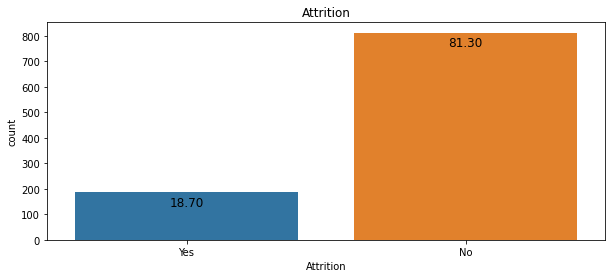

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Attrition', data=usecase_df)
for a in ax.patches:
    ax.annotate(format((a.get_height()/usecase_df.shape[0])*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.title('Attrition')

### Categorical Column Exploration

In [ ]:
cat_col = [col for col in usecase_df.columns if usecase_df[col].dtype=='object' and col!='Attrition']

for col in cat_col:
    print(f"""{str(col).upper()} 
----------------------------------------------------------------
{usecase_df[col].value_counts()}
================================================================""")

BUSINESSTRAVEL 
----------------------------------------------------------------
Rarely        721
Frequently    184
Name: BusinessTravel, dtype: int64
DEPARTMENT 
----------------------------------------------------------------
Research & Development    667
Sales                     288
Human Resources            45
Name: Department, dtype: int64
GENDER 
----------------------------------------------------------------
Male      607
Female    393
Name: Gender, dtype: int64
JOBROLE 
----------------------------------------------------------------
Research Scientist           237
Laboratory Technician        207
Sales Executive              199
Manufacturing Director        86
Healthcare Representative     79
Sales Representative          77
Human Resources               41
Research Director             37
Manager                       37
Name: JobRole, dtype: int64
MARITALSTATUS 
----------------------------------------------------------------
Married     434
Single      342
Divorced   

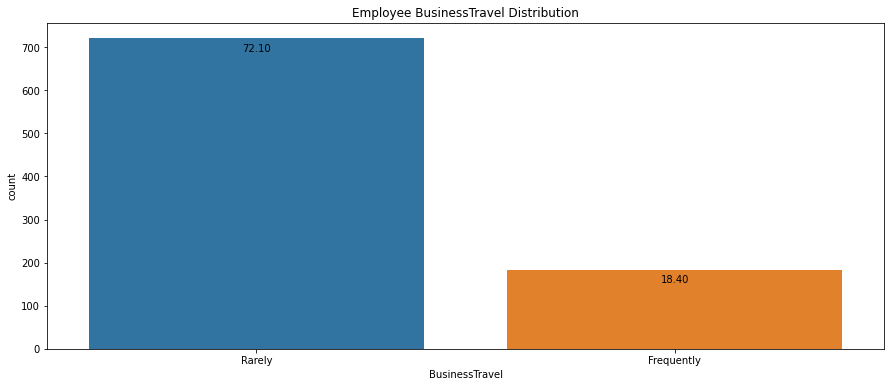

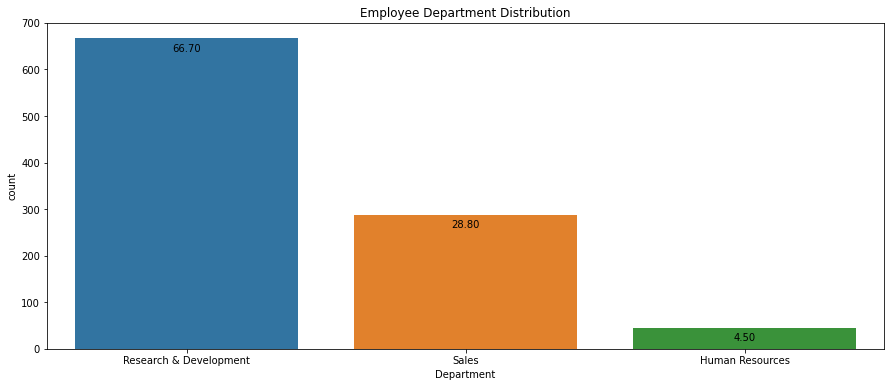

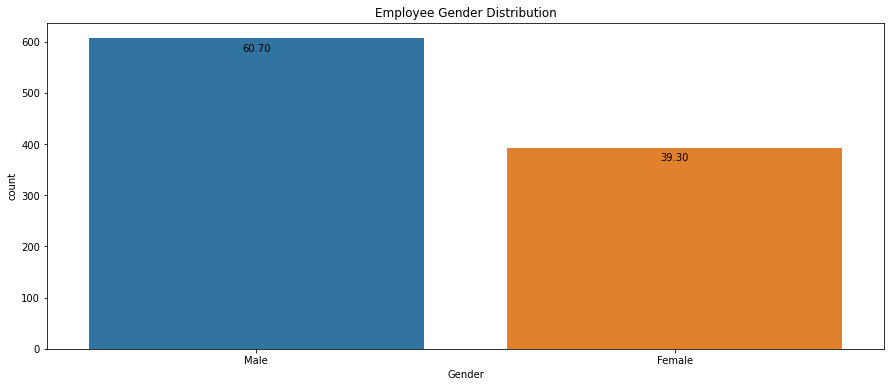

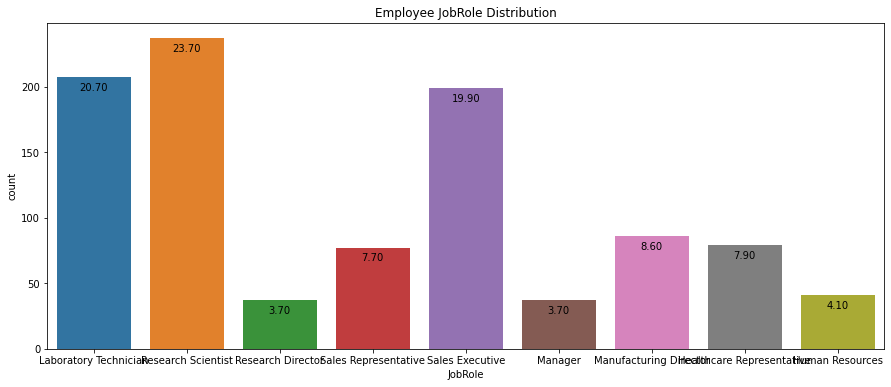

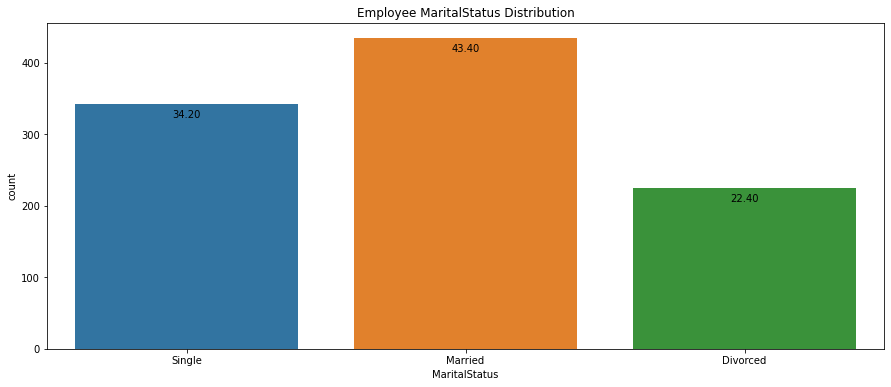

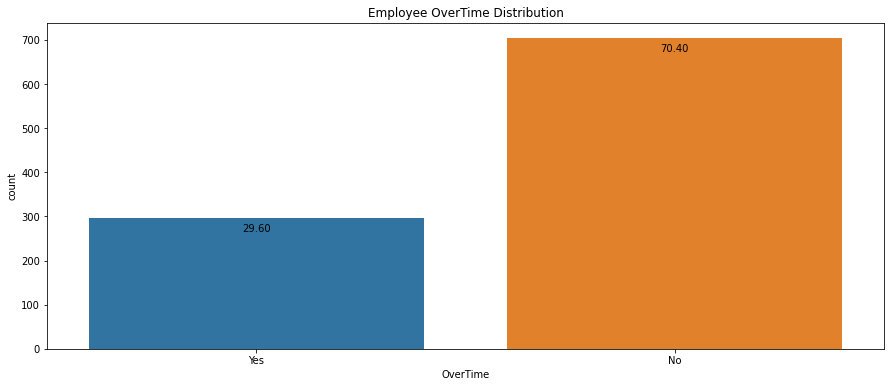

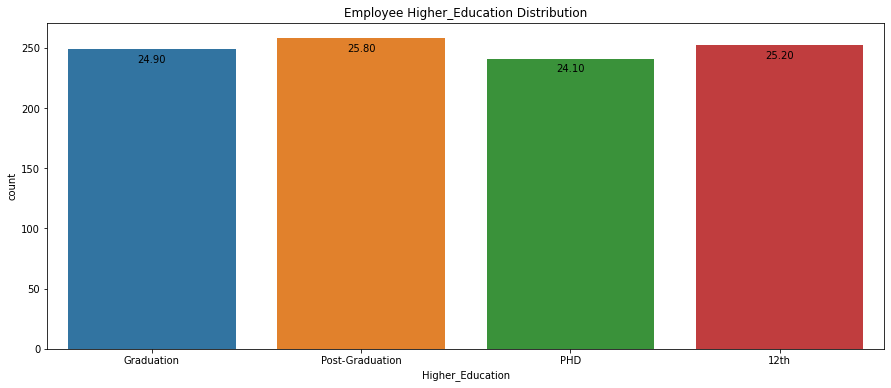

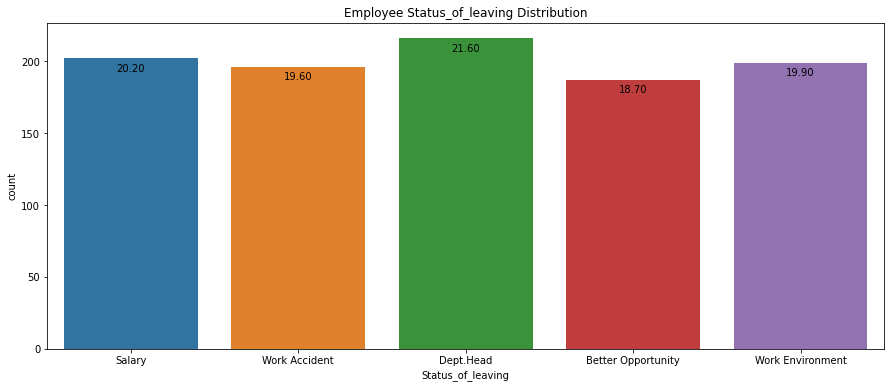

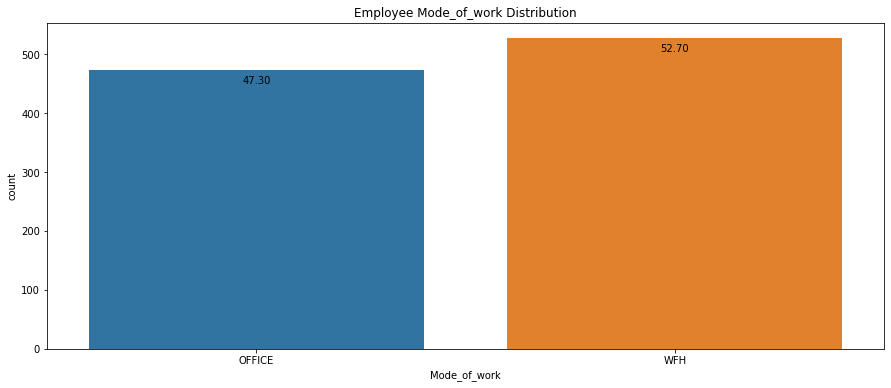

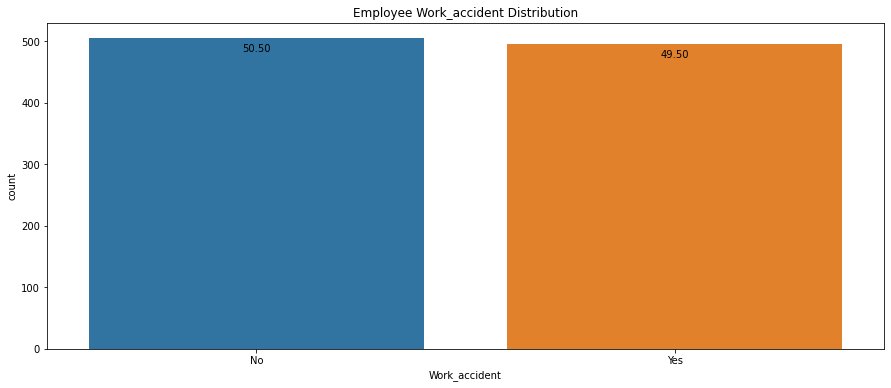

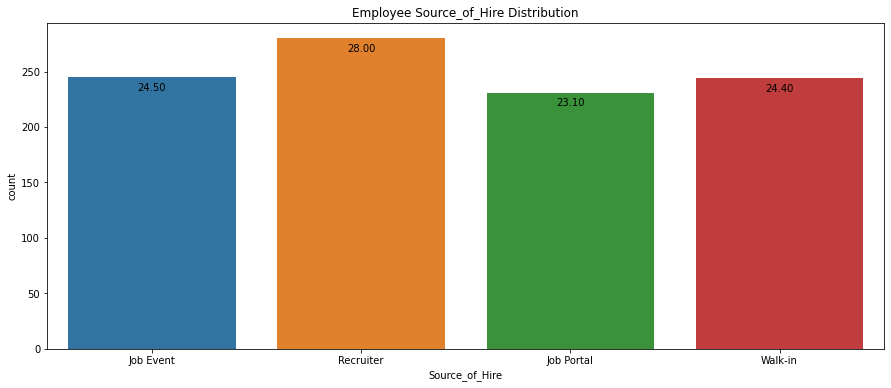

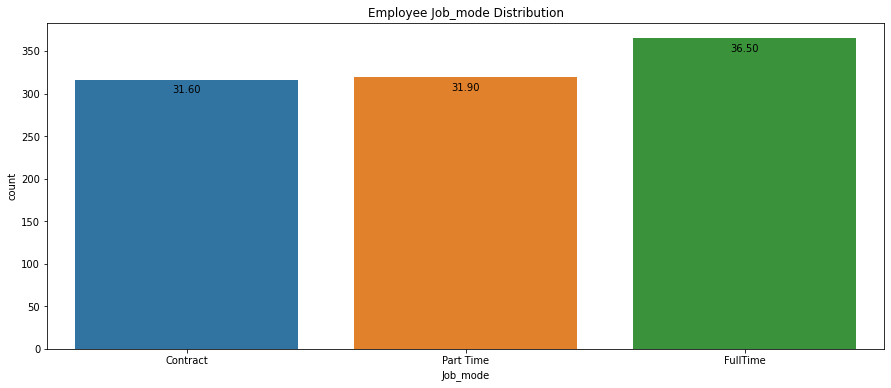

In [ ]:
# visualisasi countplot pada masing-masing kolom kategorikal
for col in cat_col:
    # visualsiasi value count tiap kolom kategorikal
    plt.figure(figsize=(15,6))
    ax = sns.countplot(x=col, data=usecase_df)
    # buat anotasi dengan ax.patches
    for pat in ax.patches:
        ax.annotate(format((pat.get_height()/usecase_df.shape[0])*100,'.2f'), (pat.get_x() + pat.get_width()/2., pat.get_height()),\
                    ha='center',va='center',size=10,xytext=(0, -10),textcoords='offset points')
    plt.title('Employee ' + col + ' Distribution')

Univariate about Affect of Categorical Column with Attrition

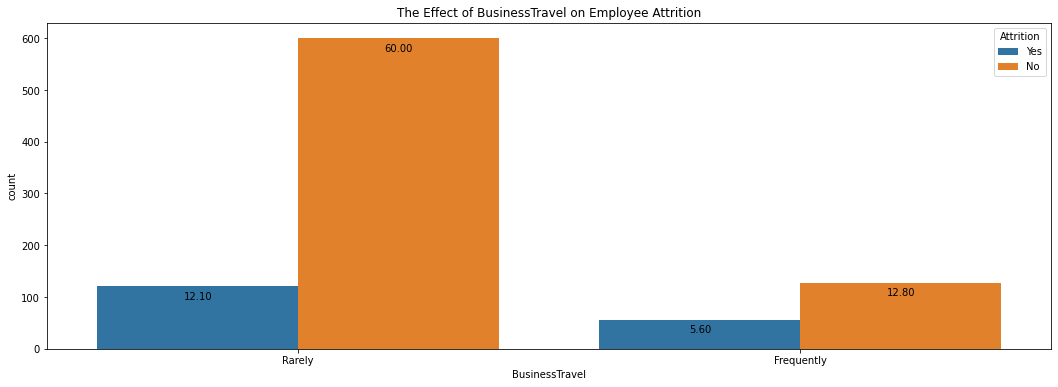

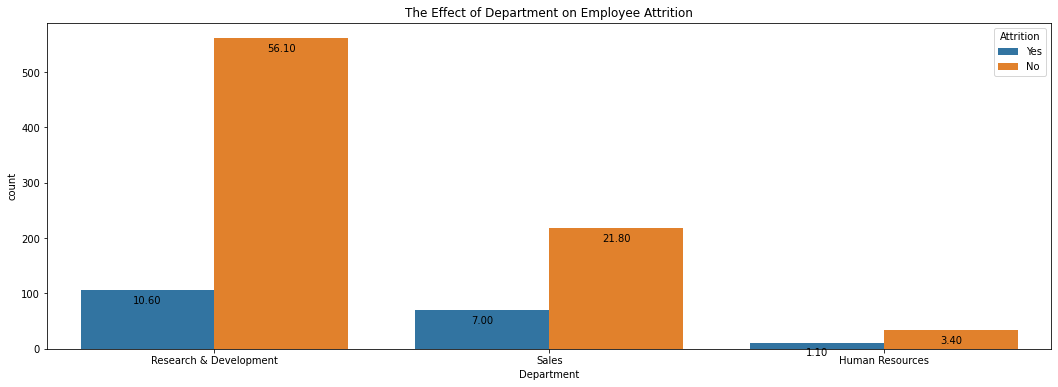

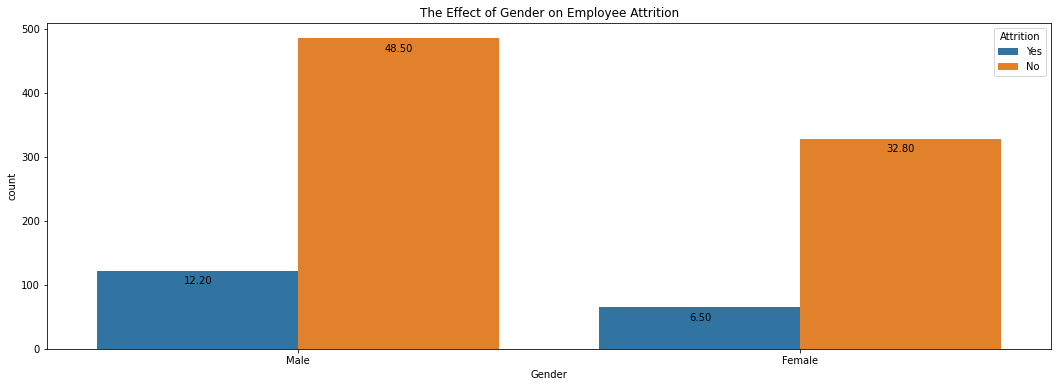

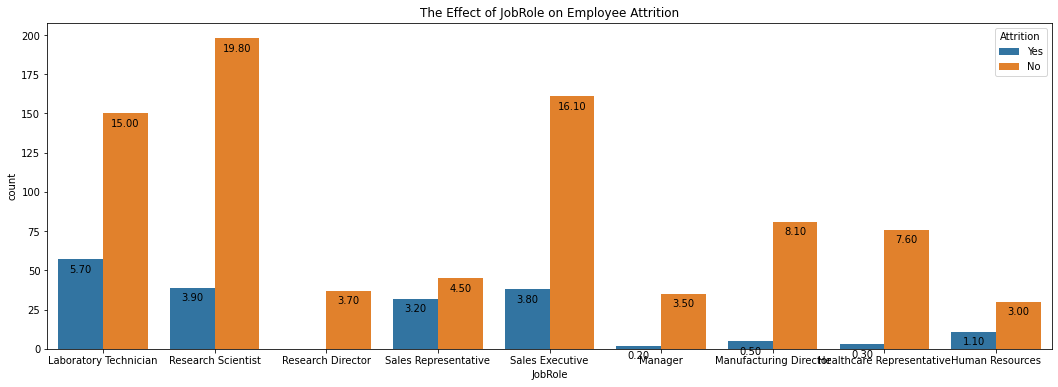

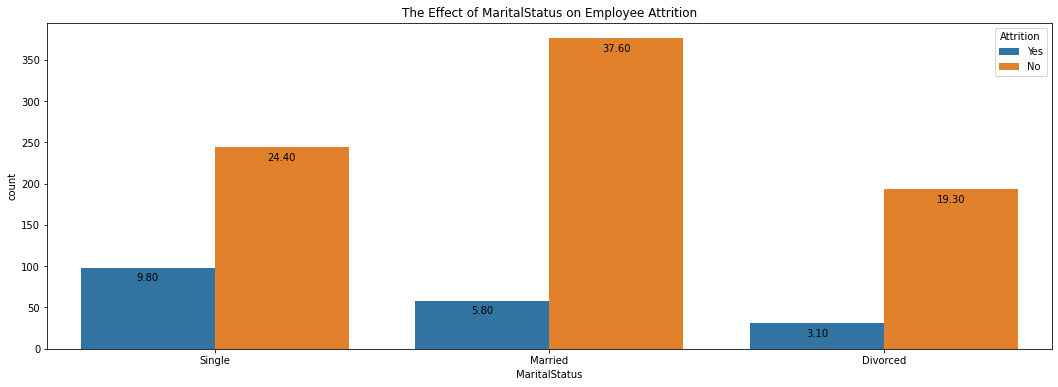

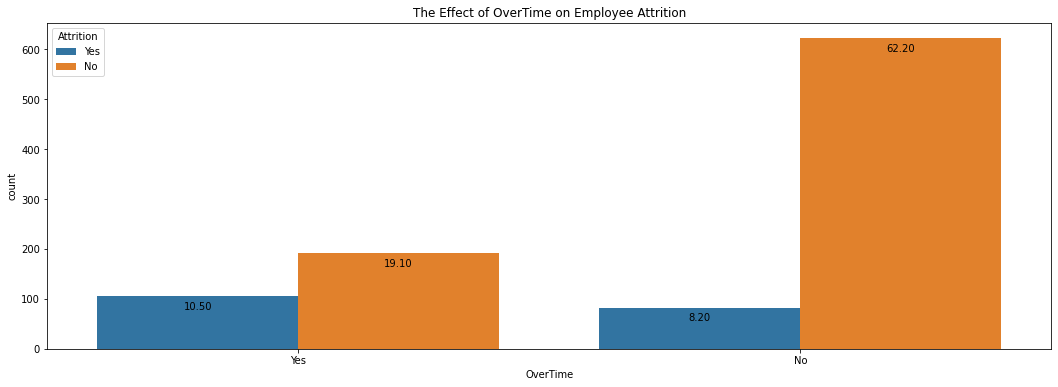

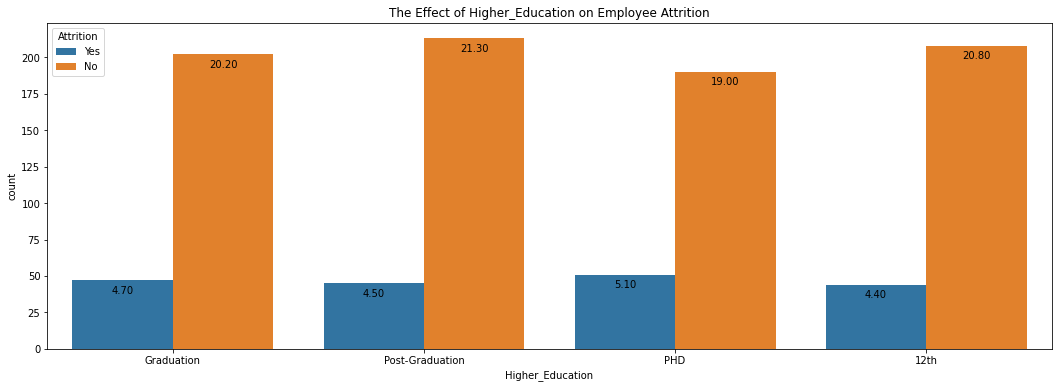

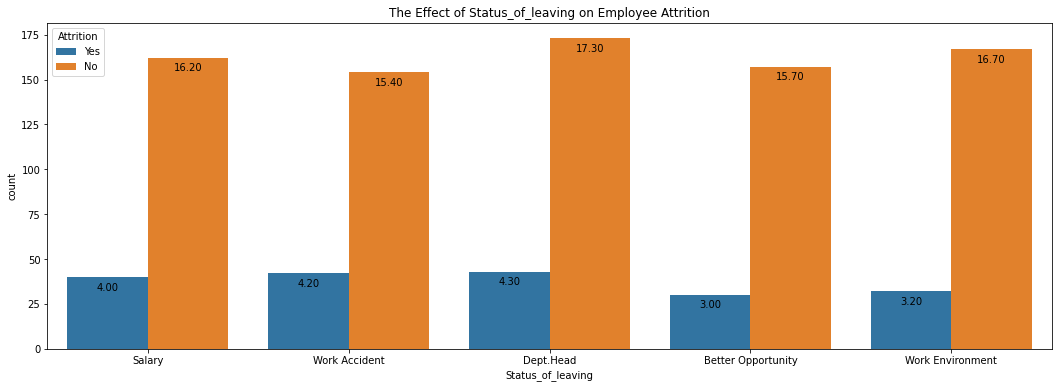

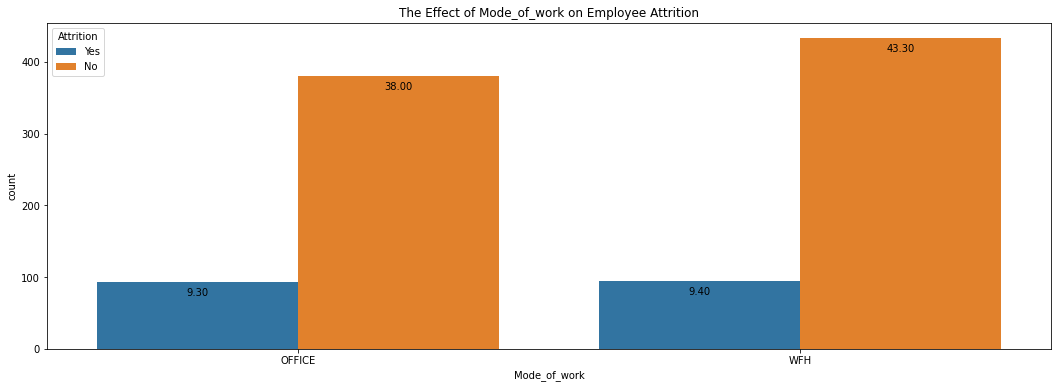

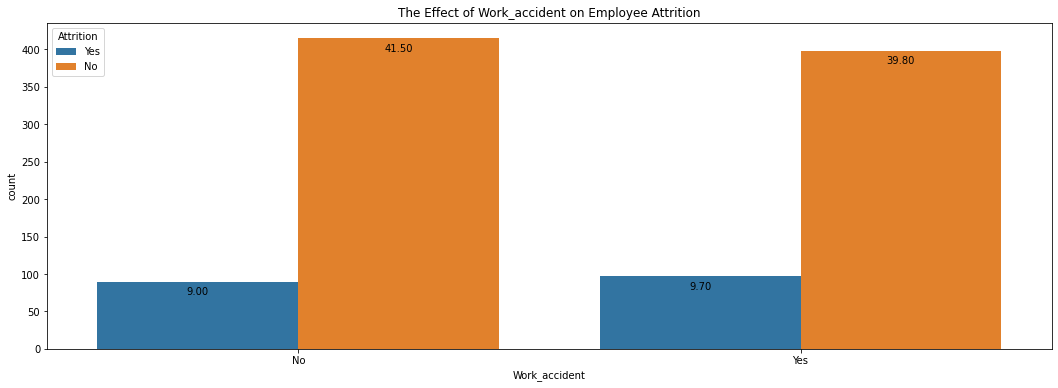

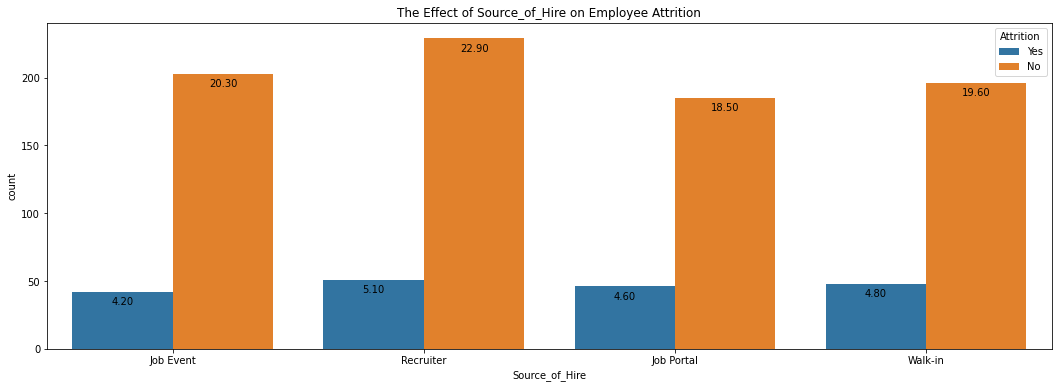

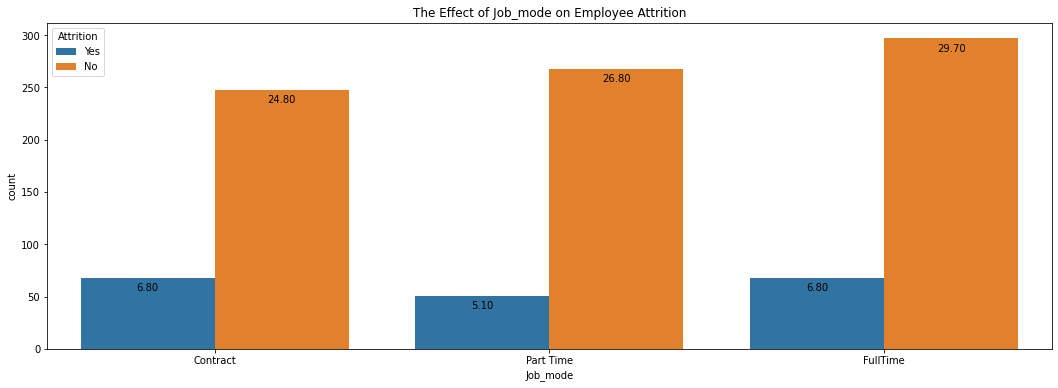

In [ ]:
# memeriksa distribusi kolom kategorikal yang mempengaruhi 
for col in cat_col:
    # visualsiasi value count tiap kolom kategorikal
    plt.figure(figsize=(18,6))
    ax = sns.countplot(x=col, data=usecase_df, hue='Attrition')
    # buat anotasi dengan ax.patches
    for pat in ax.patches:
        ax.annotate(format((pat.get_height()/usecase_df.shape[0])*100,'.2f'), (pat.get_x() + pat.get_width()/2., pat.get_height()),\
                    ha='center',va='center',size=10,xytext=(0, -10),textcoords='offset points')
    plt.title('The Effect of ' + col + ' on Employee Attrition')

### Numerical Column Exploration

In [ ]:
# plt.figure(figsize=(15, 10))
num_col = usecase_df.select_dtypes(exclude=[object]).columns

for col in num_col:
    print(f"""{str(col).upper()}
------------------------------------------------------
max : {usecase_df[col].max():.2f}
min : {usecase_df[col].min():.2f}
mean : {usecase_df[col].mean():.2f}
======================================================""")

AGE
------------------------------------------------------
max : 60.00
min : 18.00
mean : 35.54
DISTANCEFROMHOME
------------------------------------------------------
max : 29.00
min : 1.00
mean : 8.99
JOBINVOLVEMENT
------------------------------------------------------
max : 4.00
min : 1.00
mean : 2.73
JOBLEVEL
------------------------------------------------------
max : 5.00
min : 1.00
mean : 1.75
JOBSATISFACTION
------------------------------------------------------
max : 4.00
min : 1.00
mean : 2.72
MONTHLYINCOME
------------------------------------------------------
max : 19943.00
min : 1009.00
mean : 5338.10
NUMCOMPANIESWORKED
------------------------------------------------------
max : 9.00
min : 0.00
mean : 2.94
PERCENTSALARYHIKE
------------------------------------------------------
max : 25.00
min : 11.00
mean : 15.22
PERFORMANCERATING
------------------------------------------------------
max : 4.00
min : 3.00
mean : 3.15
STOCKOPTIONLEVEL
-----------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

<Figure size 360x576 with 0 Axes>

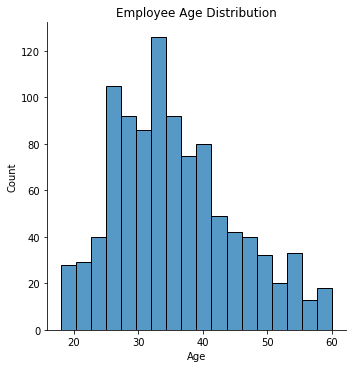

<Figure size 360x576 with 0 Axes>

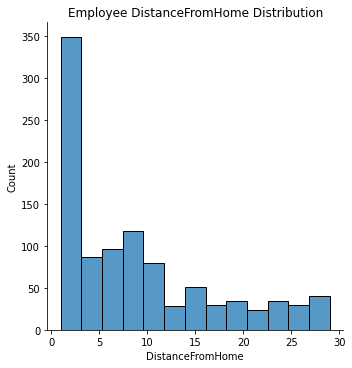

<Figure size 360x576 with 0 Axes>

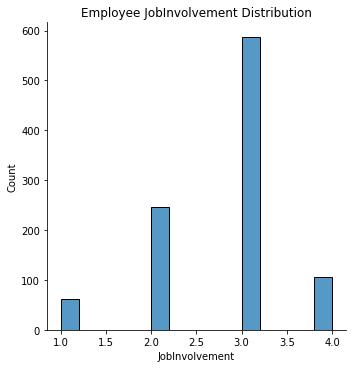

<Figure size 360x576 with 0 Axes>

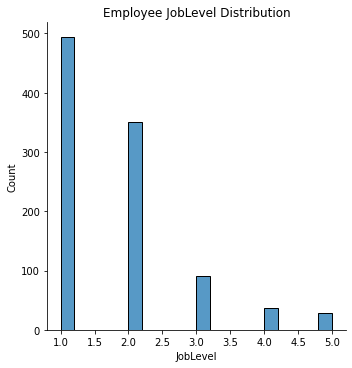

<Figure size 360x576 with 0 Axes>

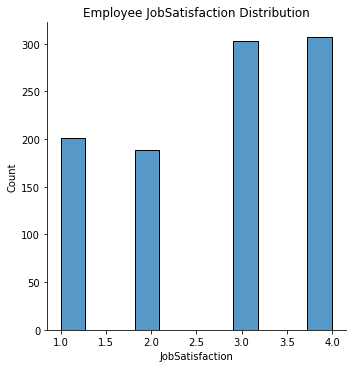

<Figure size 360x576 with 0 Axes>

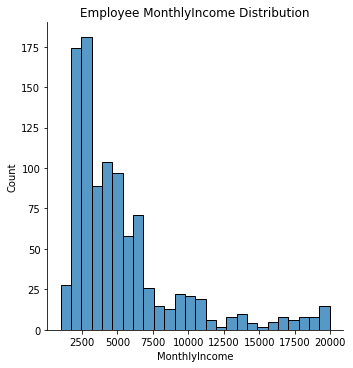

<Figure size 360x576 with 0 Axes>

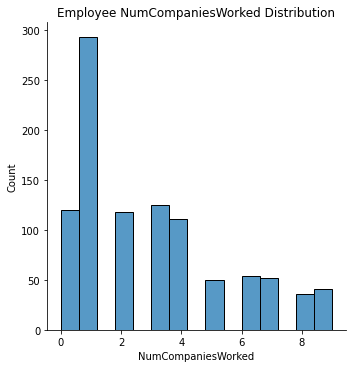

<Figure size 360x576 with 0 Axes>

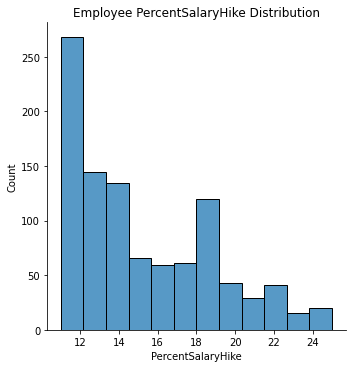

<Figure size 360x576 with 0 Axes>

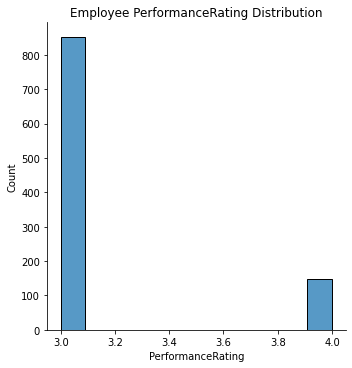

<Figure size 360x576 with 0 Axes>

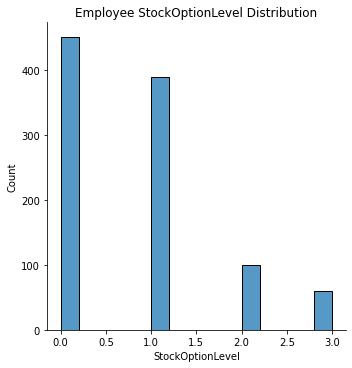

<Figure size 360x576 with 0 Axes>

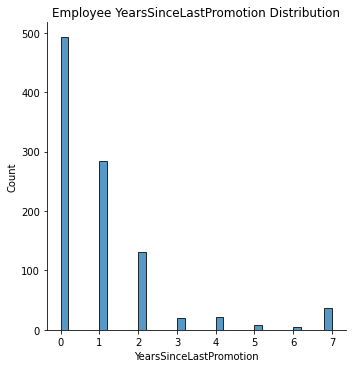

<Figure size 360x576 with 0 Axes>

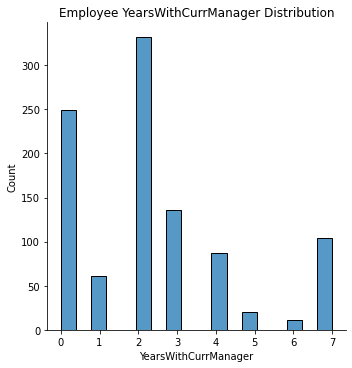

<Figure size 360x576 with 0 Axes>

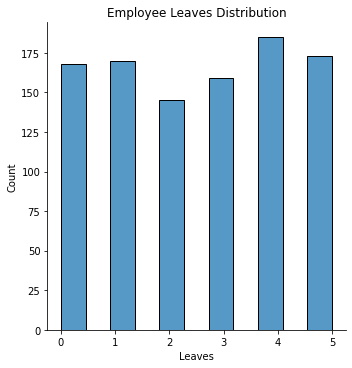

<Figure size 360x576 with 0 Axes>

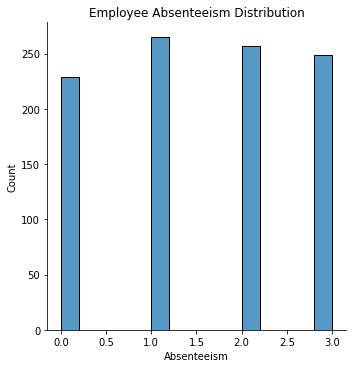

In [ ]:
# visualisasi distribusi untuk masing-masing nilai numerik
for nucol in num_col: 
    # visualsiasi value count tiap kolom kategorikal
    plt.figure(figsize=(5,8))
    # menggunakan distplot
    ax = sns.displot(x=nucol, data=usecase_df)
    plt.title('Employee ' + nucol + ' Distribution')

Multivariate with heatmap correlation analysis

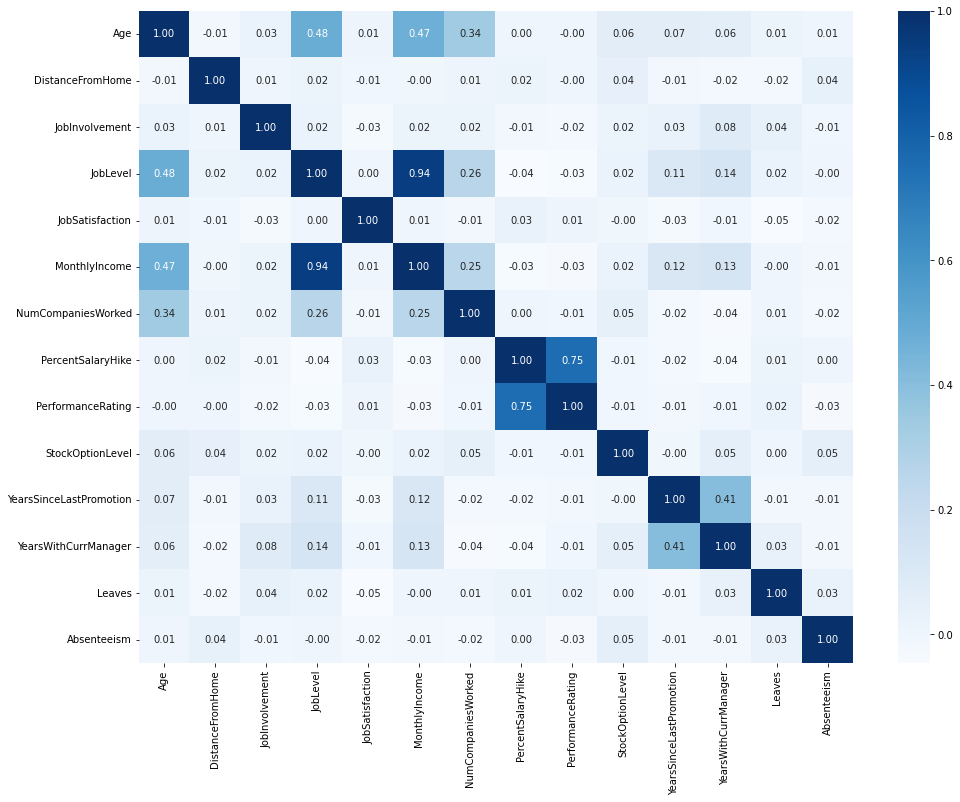

In [ ]:
# multivariate correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(usecase_df[num_col].corr(), annot=True, fmt='.2f', cmap='Blues')

## Data Preparation

In [ ]:
# for data preparation and train test split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Categorical Column Encoding

In [ ]:
label_encode = LabelEncoder()

# encoding semua kolom kategorikal
for col in usecase_df.columns:
    # kalau kolom numerik, ga diapa2in
    if usecase_df[col].dtype == np.number:
        continue
    # kalau kolom kategorikal, encode dengan label encoder
    usecase_df[col] = label_encode.fit_transform(usecase_df[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# liat dataframe hasil label encoding
usecase_df[cat_col].head()

,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Higher_Education,Status_of_leaving,Mode_of_work,Work_accident,Source_of_Hire,Job_mode
0,1,1,1,2,2,1,1,2,0,0,0,0
1,1,1,1,6,2,0,1,3,1,0,2,2
2,1,1,1,5,1,1,3,1,1,0,0,0
3,1,2,1,8,0,0,2,3,0,1,2,1
4,1,1,0,2,2,0,2,0,1,0,0,0


### Label Column Encoding
encoding column label dengan label encoder

In [ ]:
# encoding column label dengan label encoder
usecase_df['Attrition'] = label_encode.fit_transform(usecase_df['Attrition'])

# tampilkan 5 baris teratas
usecase_df['Attrition'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    1
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

### Numerical Column Encoding

In [ ]:
# feature scaling dengan standardscaler
# standard = StandardScaler()

# encoding semua kolom numerikal
# for col in num_col:
#     usecase_df[[col]] = standard.fit_transform(usecase_df[[col]])

# usecase_df[num_col].head()

In [ ]:
# feature range nentuin range scale dari data (normalnya 0 - 1) atau -1, 1
minmax = MinMaxScaler(feature_range=(0, 5))

usecase_col = list(usecase_df.columns)
usecase_col.remove('Attrition')

# for col in num_col:
for col in usecase_col:
    usecase_df[col] = usecase_df[col].astype(float)
    usecase_df[[col]] = minmax.fit_transform(usecase_df[[col]])

usecase_df['Attrition'] = pd.to_numeric(usecase_df['Attrition'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Cek Kondisi kolom setelah di lakukan Encoding dan Scaling, hingga berubah menjadi `float` sepenuhnya

In [ ]:
# kondisi kolom dari Age - OverTime
usecase_df.loc[:15,'Age':'OverTime']

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime
0,2.261905,1.0,2.5,2.5,0.178571,5.0,1.666667,0.00,1.250,3.333333,5.0,0.326797,3.333333,5.0
1,0.357143,0.0,2.5,2.5,2.500000,5.0,3.333333,0.00,3.750,5.000000,5.0,0.054466,0.555556,0.0
2,3.214286,0.0,2.5,2.5,0.892857,5.0,3.333333,2.50,3.125,0.000000,2.5,4.635076,2.222222,5.0
3,0.595238,0.0,2.5,5.0,0.178571,5.0,3.333333,0.00,5.000,0.000000,0.0,0.691721,1.666667,0.0
4,0.476190,0.0,2.5,2.5,2.500000,0.0,3.333333,0.00,1.250,5.000000,5.0,1.541394,0.555556,0.0
5,0.119048,1.0,2.5,5.0,3.750000,5.0,3.333333,0.00,5.000,3.333333,5.0,0.136166,0.555556,5.0
6,0.119048,1.0,0.0,5.0,0.000000,0.0,0.000000,0.00,5.000,0.000000,5.0,0.702614,0.000000,0.0
7,1.190476,1.0,2.5,2.5,0.178571,5.0,3.333333,0.00,1.250,3.333333,5.0,1.998911,1.111111,0.0
8,1.309524,0.0,2.5,5.0,0.178571,5.0,1.666667,1.25,4.375,1.666667,2.5,3.828976,1.111111,0.0
9,0.000000,1.0,2.5,2.5,0.357143,5.0,3.333333,0.00,1.250,3.333333,5.0,0.092593,0.555556,0.0


In [ ]:
# kondisi kolom dari PercentSalaryHike - Job_mode
usecase_df.loc[:15,'PercentSalaryHike':'Job_mode'] 

,PercentSalaryHike,PerformanceRating,StockOptionLevel,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,1.428571,0.0,0.000000,0.0,0.0,1.666667,2.50,0.0,4.0,3.333333,0.0,0.000000,0.0
1,1.071429,0.0,0.000000,0.0,0.0,1.666667,3.75,5.0,5.0,3.333333,0.0,3.333333,5.0
2,1.071429,0.0,0.000000,0.0,0.0,5.000000,1.25,5.0,1.0,5.000000,0.0,0.000000,0.0
3,0.714286,0.0,1.666667,0.0,0.0,3.333333,3.75,0.0,1.0,0.000000,5.0,3.333333,2.5
4,1.428571,0.0,0.000000,0.0,0.0,3.333333,0.00,5.0,5.0,3.333333,0.0,0.000000,0.0
5,2.857143,0.0,0.000000,0.0,0.0,3.333333,3.75,5.0,1.0,1.666667,5.0,1.666667,5.0
6,3.571429,5.0,0.000000,0.0,0.0,3.333333,3.75,5.0,2.0,3.333333,0.0,5.000000,0.0
7,0.000000,0.0,0.000000,0.0,0.0,5.000000,5.00,5.0,0.0,3.333333,0.0,5.000000,0.0
8,2.857143,0.0,3.333333,0.0,0.0,1.666667,0.00,0.0,5.0,3.333333,0.0,5.000000,5.0
9,0.714286,0.0,0.000000,0.0,0.0,3.333333,5.00,5.0,5.0,3.333333,0.0,5.000000,2.5


### Bivariate Correlation Between Numerical and Label Column 2

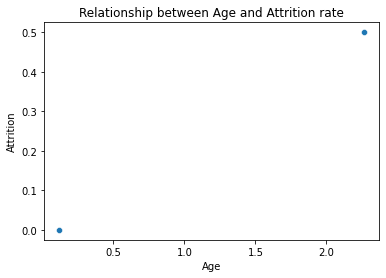

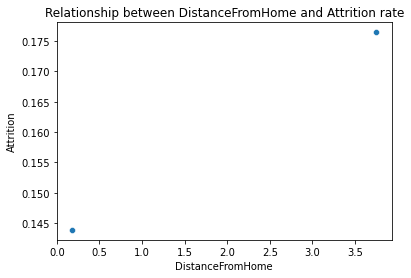

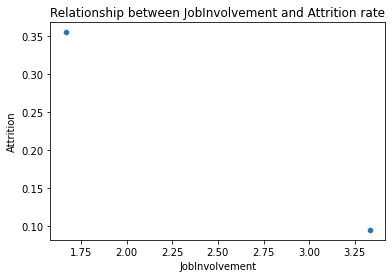

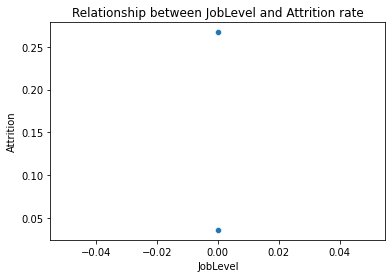

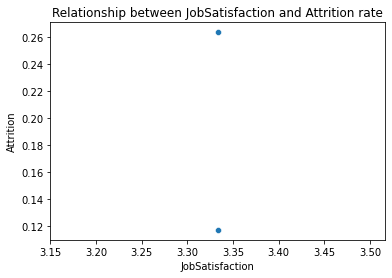

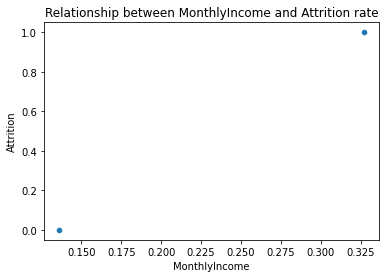

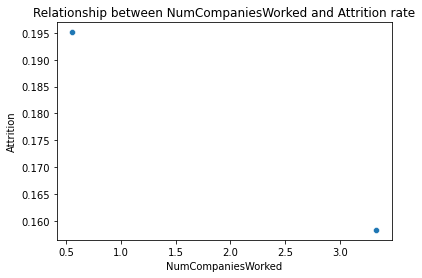

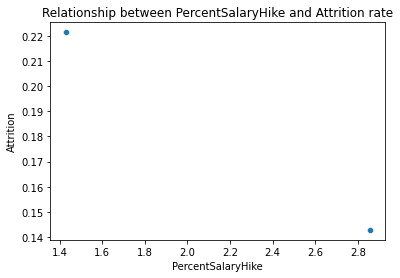

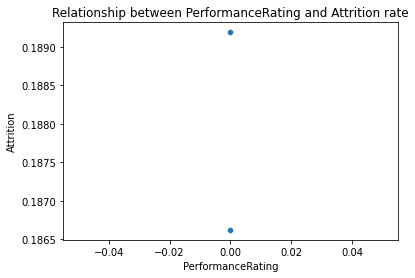

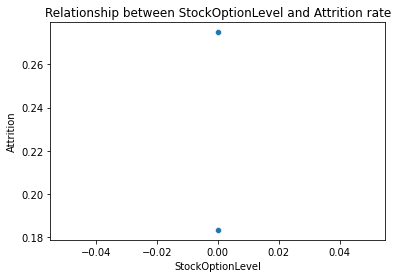

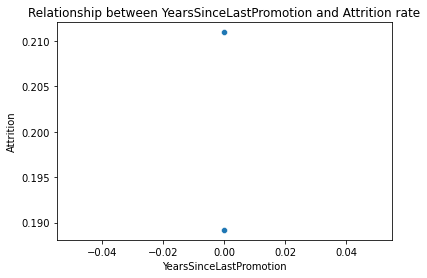

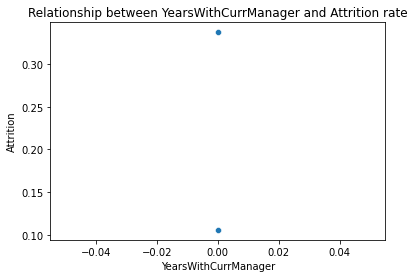

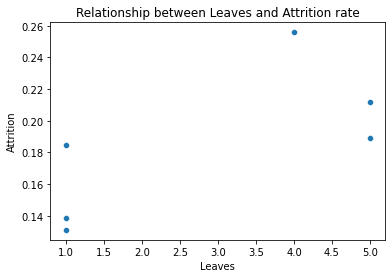

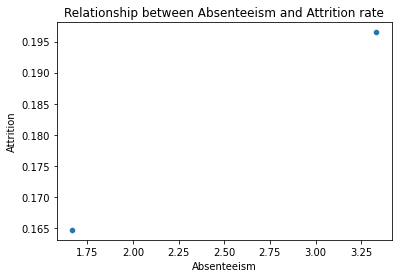

In [ ]:
# menggunakan num col dari kolom sebelumnya

for col in num_col:
    # mencari korelasi antara kolom numerik dan label
    sns.scatterplot(x=usecase_df[col],y=usecase_df.groupby(col)['Attrition'].mean())
    plt.title("Relationship between " + col +" and Attrition rate")
    plt.show()

### Multivariate Correlation with Entire Columns

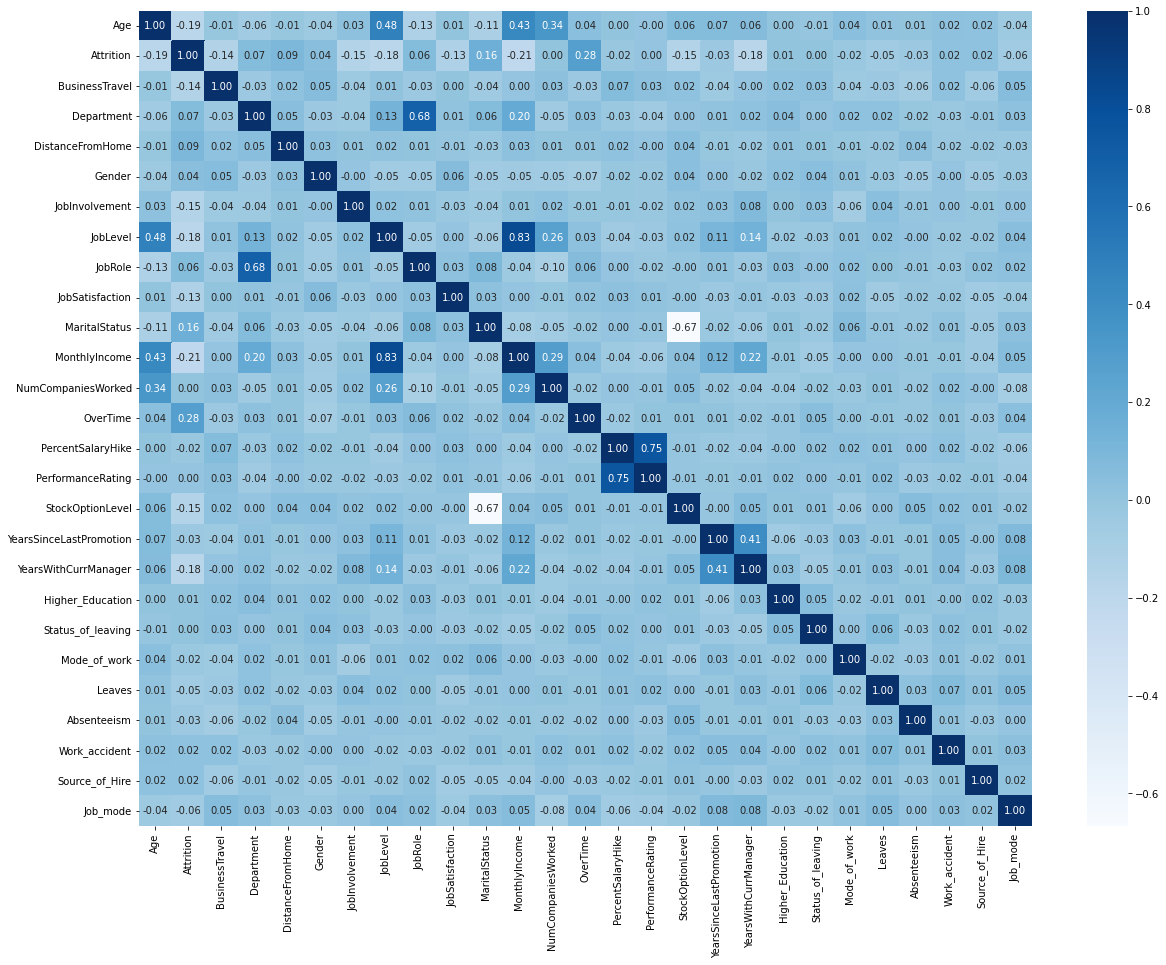

In [ ]:
# multivariate correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(usecase_df.corr(), annot=True, fmt='.2f', cmap='Blues')

## Data Modelling

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

# for data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# for measuerement and evalution metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

### Train Test Split
Split data into Feature and target, then Train and Test Split

In [ ]:
# define the feature and target
X = usecase_df.drop('Attrition', axis=1)
y = usecase_df['Attrition']

# split data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"""Data Train Size from Feature : {X_train.shape}
Data Train Size from Label : {y_train.shape}
Data Test Size from Feature : {X_test.shape}
Data Test Size from Label : {y_test.shape}""")

Data Train Size from Feature : (700, 26)
Data Train Size from Label : (700,)
Data Test Size from Feature : (300, 26)
Data Test Size from Label : (300,)


###  Logistic Regresion


In [ ]:
# logistic regression with 1000 params and 1000 max iter
loreg = LogisticRegression(C = 1000, max_iter = 1000)
loreg.fit(X_train, y_train)
loreg_predict = loreg.predict(X_test)

###  Decision Tree


In [ ]:
# decision tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

###  Random Forest


In [ ]:
# random forest with 1000 n_estimator and 40 random state
rfc = RandomForestClassifier(n_estimators=1000, random_state = 40)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

###  Support Vector Machine


In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)

###  K-Nearest Neighbor


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

### Model Evaluation
Viewing Accuracy score from each model, 

terdapat 3 model dengan akurasi teratas yaitu
- Logistic Regression
- Random Forest 
- SVM

In [ ]:
# logistic regression
lr_accuracy = accuracy_score(y_test, loreg_predict)
print(f'Logistic Regression Accuracy : {lr_accuracy:.2f}\n')

# decision tree classifier
dtree_accuracy = accuracy_score(y_test, dtree_predict)
print(f'Decision Tree Accuracy : {dtree_accuracy:.2f}\n')

# random forest
rf_accuracy = accuracy_score(y_test, rfc_predict)
print(f'Random Forest Accuracy : {rf_accuracy:.2f}\n')

# k-nearest neigbor
knn_accuracy = accuracy_score(y_test, knn_predict)
print(f'K-Nearest Neighbor Accuracy : {knn_accuracy:.2f}\n')

# support vector machine
svm_accuracy = accuracy_score(y_test, svm_predict)
print(f'Support Vector Machine Accuracy : {svm_accuracy:.2f}')

Logistic Regression Accuracy : 0.82

Decision Tree Accuracy : 0.73

Random Forest Accuracy : 0.82

K-Nearest Neighbor Accuracy : 0.81

Support Vector Machine Accuracy : 0.83


### Classification Report

In [ ]:
# logistic regression
lr_clr = classification_report(y_test, loreg_predict)
print(f'Logistic Regression Report :\n {lr_clr}\n')

# decision tree classifier
dtree_clr = classification_report(y_test, dtree_predict)
print(f'Decision Tree Report :\n {dtree_clr}\n')

# random forest
rf_clr = classification_report(y_test, rfc_predict)
print(f'Random Forest Report :\n {rf_clr}\n')

# k-nearest neigbor
knn_clr = classification_report(y_test, knn_predict)
print(f'K-Nearest Neighbor Report :\n {knn_clr}\n')

# support vector machine
svm_clr = classification_report(y_test, svm_predict)
print(f'Support Vector Machine Report :\n {svm_clr}')

Logistic Regression Report :
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       246
           1       0.51      0.35      0.42        54

    accuracy                           0.82       300
   macro avg       0.69      0.64      0.66       300
weighted avg       0.80      0.82      0.81       300


Decision Tree Report :
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       246
           1       0.27      0.30      0.28        54

    accuracy                           0.73       300
   macro avg       0.55      0.56      0.56       300
weighted avg       0.74      0.73      0.73       300


Random Forest Report :
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       246
           1       0.44      0.07      0.13        54

    accuracy                           0.82       300
   macro avg       0.64      0.53      0.51     

### Confusion Matrix

Logistic Regression Confusion Matrix :



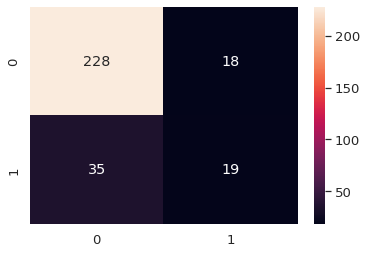

In [ ]:
# logistic regression
lr_cm = confusion_matrix(y_test, loreg_predict)
print('Logistic Regression Confusion Matrix :\n')
sns.set(font_scale = 1.2)
sns.heatmap(lr_cm, annot = True,fmt = 'd')

Decision Tree Confusion Matrix :



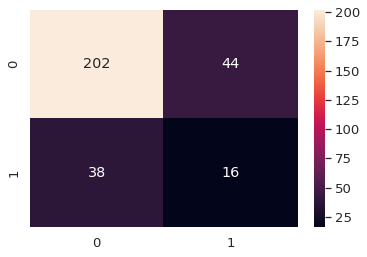

In [ ]:
# decision tree classifier
dtree_cm = confusion_matrix(y_test, dtree_predict)
print('Decision Tree Confusion Matrix :\n')
sns.set(font_scale = 1.2)
sns.heatmap(dtree_cm, annot = True,fmt = 'd')

Random Forest Confusion Matrix :



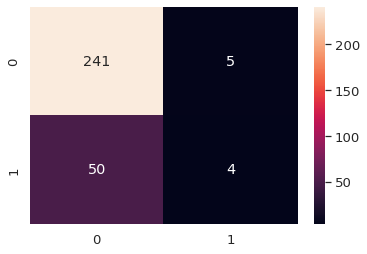

In [ ]:
# random forest
rf_cm = confusion_matrix(y_test, rfc_predict)
print('Random Forest Confusion Matrix :\n')
sns.set(font_scale = 1.2)
sns.heatmap(rf_cm, annot = True,fmt = 'd')

K-Nearest Neighbor Confusion Matrix :



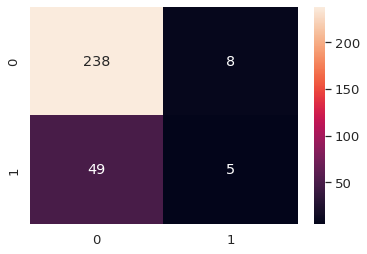

In [ ]:
# k-nearest neigbor
knn_cm = confusion_matrix(y_test, knn_predict)
print('K-Nearest Neighbor Confusion Matrix :\n')
sns.set(font_scale = 1.2)
sns.heatmap(knn_cm, annot = True,fmt = 'd')

Support Vector Machine Confusion Matrix :



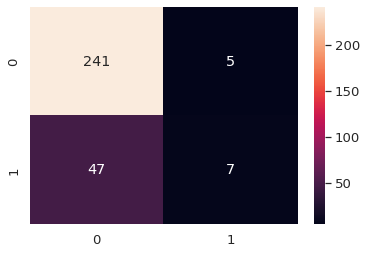

In [ ]:
# support vector machine
svm_cm = confusion_matrix(y_test, svm_predict)
print('Support Vector Machine Confusion Matrix :\n')
sns.set(font_scale = 1.2)
sns.heatmap(svm_cm, annot = True,fmt = 'd')

### Hyperparameter Tunning
Logistic Regression Classifier Tunning

In [ ]:
# K Fold Validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
loreg_cv = LogisticRegression(C = 1000, max_iter = 1000)
results = cross_val_score(loreg_cv, X_train, y_train, 
                          cv=kfold, scoring='roc_auc')
print(f'AUC Score (STD) : {results.mean():.2f} ({results.std()})')

loreg_cv.fit(X_train, y_train)
lr_cv_pred = loreg_cv.predict(X_test)
lr_cv_acc = accuracy_score(y_test, lr_cv_pred)
print(f'Logistic Regression Accuracy : {lr_cv_acc:.2f}')

AUC Score (STD) : 0.84 (0.07103610806399278)
Logistic Regression Accuracy : 0.82


In [ ]:
# hyper-parameter list to fine-tune
param_grid = {'C' : np.arange(1e-03, 2, 0.01)}

# Grid Search CV settings
loreg_gs = GridSearchCV(LogisticRegression(C = 1000, max_iter = 1000), 
                        return_train_score = True,
                        param_grid = param_grid, 
                        scoring = 'accuracy', 
                        cv=10)

loreg_grid = loreg_gs.fit(X_train, y_train)
loreg_opt = loreg_grid.best_estimator_
results = loreg_gs.cv_results_

print(f"""===================================
best estimatos             : {loreg_gs.best_estimator_}
best params                : {loreg_gs.best_params_}
best score                 : {loreg_gs.best_score_}""")

best estimatos             : LogisticRegression(C=0.040999999999999995, max_iter=1000)
best params                : {'C': 0.040999999999999995}
best score                 : 0.8685714285714285


In [ ]:
# applying logistic regression with best params
loreg_gbs = LogisticRegression(**loreg_gs.best_params_)
loreg_gbs.fit(X_train, y_train)

lrg_gbs_pred = loreg_gbs.predict(X_test)
lrg_gbs_acc = accuracy_score(y_test, lrg_gbs_pred)
print(f'Logistic Regression Accuracy : {lrg_gbs_acc:.2f}\n')

# logistic regression classification report
lr_clr = classification_report(y_test, lrg_gbs_pred)
print(f'Logistic Regression Report :\n {lr_clr}\n')

# logistic regression confusion matrix
lr_cm = confusion_matrix(y_test, lrg_gbs_pred)
print(f'Logistic Regression Confusion Matrix :\n {lr_cm}')

Logistic Regression Accuracy : 0.83

Logistic Regression Report :
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       246
         1.0       0.54      0.28      0.37        54

    accuracy                           0.83       300
   macro avg       0.70      0.61      0.63       300
weighted avg       0.80      0.83      0.80       300


Logistic Regression Confusion Matrix :
 [[233  13]
 [ 39  15]]


Decision Tree Clasifier Tunning

In [ ]:
# parameter for grid search
params = {'criterion' : ('gini', 'entropy'),
          'splitter' : ('best', 'random'),
          'max_depth' : (list(range(1, 20))),
          'min_samples_split' : [2, 3, 4],
          'min_samples_leaf' : list(range(1, 20))}

# applying grid search cv
dtree = DecisionTreeClassifier(random_state = 42)
dtr_cv = GridSearchCV(dtree, param_grid = params, scoring='accuracy',
                      n_jobs=-1, verbose=1, cv=3)
dtr_cv.fit(X_train, y_train)
print(f'Best Parameters : {dtr_cv.best_params_}')

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best Parameters : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}


gunakan decision tree dengan best params

In [ ]:
# applying decision tree with best params
dtree = DecisionTreeClassifier(**dtr_cv.best_params_)
dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

# decision tree accuracy
dtree_accuracy = accuracy_score(y_test, dtree_predict)
print(f'Decision Tree Accuracy : {dtree_accuracy:.2f}\n')

# decision tree classification report
dtree_clr = classification_report(y_test, dtree_predict)
print(f'Decision Tree Classification Report :\n {dtree_clr}\n')

# decision tree classifier
dtree_cm = confusion_matrix(y_test, dtree_predict)
print(f'Decision Tree Confusion Matrix :\n {dtree_cm}')

Decision Tree Accuracy : 0.79

Decision Tree Classification Report :
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       246
         1.0       0.40      0.35      0.38        54

    accuracy                           0.79       300
   macro avg       0.63      0.62      0.62       300
weighted avg       0.78      0.79      0.78       300


Decision Tree Confusion Matrix :
 [[218  28]
 [ 35  19]]


Random Forest Classifier with Randomized CV

In [ ]:
# random forest with 1000 n_estimator and 40 random state
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)

# parameter for randomized cv
param_grid = {'n_estimators' : [int(x) for x in np.linspace(start=100, stop=500, num=5)],
              'max_features' : [None, 'sqrt'],
              'max_depth' : [None, 5, 7, 14, 21],
              'min_samples_split' : [2, 5, 8],
              'min_samples_leaf' : [3, 4, 5],
              'bootstrap' : [True, False]} 

rf_rscv = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,
                             scoring='accuracy', n_iter=100, cv=5,
                             random_state=92, n_jobs=-1)
rf_rscv.fit(X_train, y_train)

print(f"""Grid Search CV Best AUC : {rf_rscv.best_score_:.2f}
Best Estimator: {rf_rscv.best_estimator_}
Best Parameter: {rf_rscv.best_params_}""")

Grid Search CV Best AUC : 0.85
Best Estimator: RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                       random_state=42)
Best Parameter: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}


In [ ]:
# random forest with best params
rfc = RandomForestClassifier(**rf_rscv.best_params_)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

# random forest accuracy
rfc_accuracy = accuracy_score(y_test,rfc_predict)
print(f'Random Forest Accuracy : {rfc_accuracy:.2f}\n')

# random forest classification report
rfc_clr = classification_report(y_test,rfc_predict)
print(f'Random Forest Classification Report :\n {rfc_clr}\n')

# random forest classifier
rfc_cm = confusion_matrix(y_test,rfc_predict)
print(f'Random Forest Confusion Matrix :\n {rfc_cm}')

Random Forest Accuracy : 0.82

Random Forest Classification Report :
               precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       246
         1.0       0.44      0.07      0.13        54

    accuracy                           0.82       300
   macro avg       0.64      0.53      0.51       300
weighted avg       0.76      0.82      0.76       300


Random Forest Confusion Matrix :
 [[241   5]
 [ 50   4]]


Support Vector Machine Classifier

In [ ]:
# parameter for grid search
params = {'C' : [0.1, 1, 10, 100, 1000], 
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['rbf', 'poly', 'sigmoid']}

svm = SVC()
grid_svm = GridSearchCV(SVC(), param_grid = params, 
                        refit=True, verbose = 2)
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print('SVM Grid Search Best Parameter : \n', grid_svm.best_params_)

print('SVM Grid Search Best Estimator : \n', grid_svm.best_estimator_)

SVM Grid Search Best Parameter : 
 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVM Grid Search Best Estimator : 
 SVC(C=100, gamma=0.001)


In [ ]:
svm_gbs = SVC(**grid_svm.best_params_)
svm_gbs.fit(X_train, y_train)
svm_gbs_pred = svm_gbs.predict(X_test)

# support vector machine accuracy
svm_accuracy = accuracy_score(y_test, svm_gbs_pred)
print(f'Support Vector Machine Accuracy : {svm_accuracy:.2f}\n')

# support vector machine classification report
svm_clr = classification_report(y_test, svm_gbs_pred)
print(f'Support Vector Machine Report :\n {svm_clr}\n')

# support vector machine confusion matrix
svm_cm = confusion_matrix(y_test, svm_gbs_pred)
print(f'Support Vector Machine Confusion Matrix :\n {svm_cm}\n')

Support Vector Machine Accuracy : 0.83

Support Vector Machine Report :
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       246
           1       0.52      0.41      0.46        54

    accuracy                           0.83       300
   macro avg       0.70      0.66      0.68       300
weighted avg       0.81      0.83      0.82       300


Support Vector Machine Confusion Matrix :
 [[226  20]
 [ 32  22]]



### Feature Importances
menggunakan Random Forest

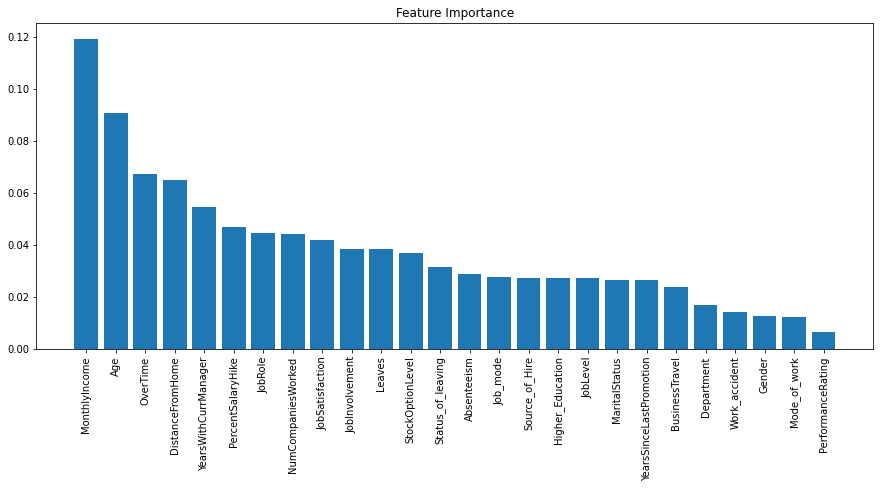

In [ ]:
importances = rfc.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices] 

# Create plot
plt.figure(figsize=(15, 6)) 
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
importances = rfc.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(26):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.119470
1,Age,0.090979
2,OverTime,0.067211
3,DistanceFromHome,0.065067
4,YearsWithCurrManager,0.054823
5,PercentSalaryHike,0.046997
6,JobRole,0.044695
7,NumCompaniesWorked,0.044215
8,JobSatisfaction,0.041897
9,JobInvolvement,0.038611


## Model Implementation
Implementasi model yang tadi pake data Real Case

### Data Inspection

In [ ]:
realcase_df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
999,30,Non-Travel,Research & Development,9,Female,3,2,Manufacturing Director,3,Single,...,PHD,09-05-2013,NaN,Work Accident,OFFICE,4,1,No,Job Event,FullTime
1000,52,Travel_Rarely,Sales,5,Male,3,3,Sales Executive,2,Single,...,PHD,13-02-2013,NaN,Salary,OFFICE,4,0,Yes,Job Event,FullTime
1001,39,Travel_Rarely,Research & Development,18,Male,3,2,Manufacturing Director,3,Single,...,Graduation,03-01-2013,NaN,Dept.Head,OFFICE,3,0,Yes,Job Event,Contract
1002,34,Travel_Rarely,Research & Development,29,Male,3,2,Laboratory Technician,3,Married,...,Graduation,01-05-2013,NaN,Better Opportunity,OFFICE,3,1,No,Recruiter,FullTime
1003,27,Travel_Rarely,Research & Development,17,Female,3,1,Research Scientist,3,Single,...,12th,04-02-2013,NaN,Better Opportunity,WFH,1,0,Yes,Walk-in,Contract


In [ ]:
realcase_df.shape

(471, 28)

In [ ]:
realcase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 999 to 1469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      471 non-null    int64  
 1   BusinessTravel           471 non-null    object 
 2   Department               471 non-null    object 
 3   DistanceFromHome         471 non-null    int64  
 4   Gender                   471 non-null    object 
 5   JobInvolvement           471 non-null    int64  
 6   JobLevel                 471 non-null    int64  
 7   JobRole                  471 non-null    object 
 8   JobSatisfaction          471 non-null    int64  
 9   MaritalStatus            471 non-null    object 
 10  MonthlyIncome            471 non-null    int64  
 11  NumCompaniesWorked       471 non-null    int64  
 12  OverTime                 471 non-null    object 
 13  PercentSalaryHike        471 non-null    int64  
 14  PerformanceRating      

In [ ]:
# check null values
realcase_df.isnull().sum()

Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome             0
Gender                       0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
StockOptionLevel             0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
Higher_Education             0
Date_of_Hire                 0
Date_of_termination        471
Status_of_leaving            0
Mode_of_work                 0
Leaves                       0
Absenteeism                  0
Work_accident                0
Source_of_Hire               0
Job_mode                     0
dtype: int64

In [ ]:
# check duplicated data
realcase_df[realcase_df.duplicated()].count()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Higher_Education           0
Date_of_Hire               0
Date_of_termination        0
Status_of_leaving          0
Mode_of_work               0
Leaves                     0
Absenteeism                0
Work_accident              0
Source_of_Hire             0
Job_mode                   0
dtype: int64

### Real Dataset Cleaning Before Applying

In [ ]:
X_real = realcase_df.copy()

X_real.drop(['Date_of_termination', 'Date_of_Hire'], axis=1, inplace=True)

# splitting business column, by split based underscore "_" on str function
bustrav = X_real['BusinessTravel'].str.split('_', n = 1, expand = True)

# kedua value dipisah ke kolom baru masing-masing
X_real['Travel'] = bustrav[0]
X_real['BusinessTraveltemp'] = bustrav[1]

# menghapus kolom Travel dan BusinessTravel yang lama
X_real.drop(['BusinessTravel', 'Travel'], axis=1, inplace=True)

# rename kolom BusinessTraveltemp jadi BusinessTravel yang baru
X_real.rename(columns={'BusinessTraveltemp': 'BusinessTravel'}, inplace=True) 

# Move the reponse variable "Attrition" Next to Attrition
posnum_2 = X_real['BusinessTravel']
X_real.drop(labels=['BusinessTravel'], axis=1,inplace = True)
X_real.insert(2, 'BusinessTravel', posnum_2)

### Real Dataset Encoding Before Applying

In [ ]:
# encoding semua kolom kategorikal
for col in X_real.columns:
    # kalau kolom numerik, ga diapa2in
    if X_real[col].dtype == np.number:
        continue
    # kalau kolom kategorikal, encode dengan label encoder
    X_real[col] = label_encode.fit_transform(X_real[col])

usecase_col = list(X_real.columns)

# for col in num_col:
for col in usecase_col:
    X_real[col] = X_real[col].astype(float)
    X_real[[col]] = minmax.fit_transform(X_real[[col]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


### Applying Model

In [ ]:
predict_attrition = svm_gbs.predict(X_real)
predict_attrition[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Prediction Result

In [ ]:
realcase_df['Attrition'] = predict_attrition
realcase_df[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender', 'JobInvolvement', 'JobLevel', 
                             'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime']].head(15)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime
999,30,1,Non-Travel,Research & Development,9,Female,3,2,Manufacturing Director,3,Single,4695,7,Yes
1000,52,0,Travel_Rarely,Sales,5,Male,3,3,Sales Executive,2,Single,8446,9,Yes
1001,39,0,Travel_Rarely,Research & Development,18,Male,3,2,Manufacturing Director,3,Single,4534,0,No
1002,34,0,Travel_Rarely,Research & Development,29,Male,3,2,Laboratory Technician,3,Married,5429,4,No
1003,27,1,Travel_Rarely,Research & Development,17,Female,3,1,Research Scientist,3,Single,2394,1,Yes
1004,29,0,Travel_Frequently,Research & Development,14,Female,3,3,Healthcare Representative,4,Single,7553,0,Yes
1005,40,0,Non-Travel,Research & Development,9,Male,3,2,Laboratory Technician,3,Divorced,3975,3,No
1006,49,0,Travel_Rarely,Research & Development,7,Male,3,3,Healthcare Representative,2,Divorced,10466,3,No
1007,28,0,Travel_Rarely,Research & Development,29,Male,1,2,Manufacturing Director,2,Married,6549,1,No
1008,40,0,Travel_Rarely,Sales,9,Male,3,2,Sales Executive,1,Married,5473,0,No


In [ ]:
realcase_df[['PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',  'YearsSinceLastPromotion',  'YearsWithCurrManager', 
                             'Higher_Education', 'Date_of_Hire', 'Date_of_termination', 'Status_of_leaving', 'Mode_of_work', 'Leaves', 
                             'Absenteeism', 'Work_accident', 'Source_of_Hire', 'Job_mode']].head(15)

,PercentSalaryHike,PerformanceRating,StockOptionLevel,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
999,18,3,0,1,7,PHD,09-05-2013,NaN,Work Accident,OFFICE,4,1,No,Job Event,FullTime
1000,19,3,0,7,7,PHD,13-02-2013,NaN,Salary,OFFICE,4,0,Yes,Job Event,FullTime
1001,11,3,0,1,7,Graduation,03-01-2013,NaN,Dept.Head,OFFICE,3,0,Yes,Job Event,Contract
1002,13,3,2,7,7,Graduation,01-05-2013,NaN,Better Opportunity,OFFICE,3,1,No,Recruiter,FullTime
1003,13,3,0,7,7,12th,04-02-2013,NaN,Better Opportunity,WFH,1,0,Yes,Walk-in,Contract
1004,12,3,0,7,7,Post-Graduation,24-01-2013,NaN,Work Accident,WFH,1,2,Yes,Walk-in,FullTime
1005,11,3,2,0,7,PHD,07-04-2013,NaN,Work Accident,OFFICE,4,3,Yes,Walk-in,FullTime
1006,14,3,2,0,7,PHD,12-03-2013,NaN,Work Accident,OFFICE,4,0,Yes,Recruiter,Contract
1007,14,3,2,1,7,PHD,12-06-2013,NaN,Salary,OFFICE,3,2,Yes,Job Event,FullTime
1008,12,3,0,7,1,Post-Graduation,13-06-2013,NaN,Dept.Head,WFH,4,0,Yes,Job Event,Part Time


In [ ]:
# lihat masing-masing jumlah value dari label
realcase_df['Attrition'].value_counts()

0    453
1     18
Name: Attrition, dtype: int64

In [ ]:
# hitung persentase dari jumlah label secara keseluruhan
stayed = realcase_df[realcase_df['Attrition'] == 0.0].shape[0]
left = realcase_df[realcase_df['Attrition'] == 1.0].shape[0]

print(f"""stayed customer : {(stayed / (stayed+left))*100:.2f} %
left percentatge : {(left / (stayed+left))*100:.2f} %""")

stayed customer : 96.18 %
left percentatge : 3.82 %


Text(0.5, 1.0, 'Prediction of Employee who Will Exit')

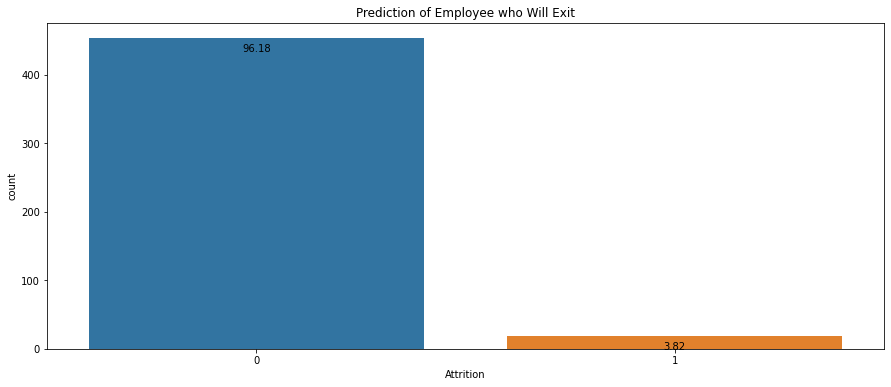

In [ ]:
# visualsiasi value count tiap kolom kategorikal
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Attrition', data=realcase_df)
# buat anotasi dengan ax.patches
for pat in ax.patches:
    ax.annotate(format((pat.get_height()/realcase_df.shape[0])*100,'.2f'), (pat.get_x() + pat.get_width()/2., pat.get_height()),\
                ha='center',va='center',size=10,xytext=(0, -10),textcoords='offset points')
plt.title('Prediction of Employee who Will Exit')

Text(0.5, 1.0, 'Correlation between MonthlyIncome and Attrition')

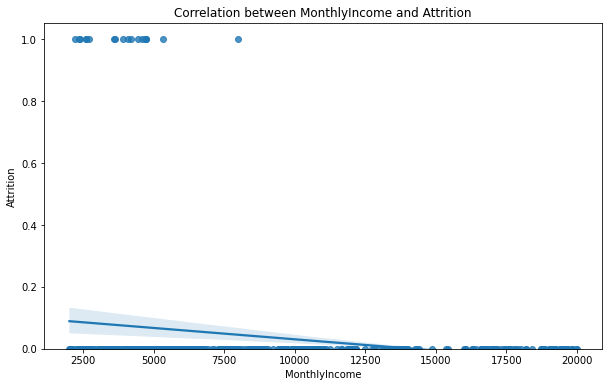

In [ ]:
# plot MonthlyIncome Attrition
plt.figure(figsize=(10, 6))
# replot(<sumbu_x>, <sumbu_y>, <data_yang_ditampilkan>)
sns.regplot(x="MonthlyIncome", y="Attrition", data=realcase_df)
plt.ylim(0,);
# judul
plt.title("Correlation between MonthlyIncome and Attrition")

Text(0.5, 1.0, 'Employee OverTime Distribution')

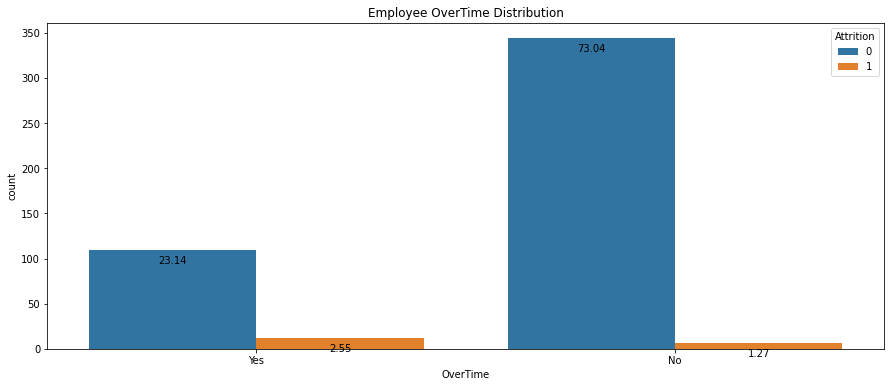

In [ ]:
# plot OverTime	Attrition
plt.figure(figsize=(15,6))
ax = sns.countplot(x='OverTime', data=realcase_df, hue='Attrition')
# buat anotasi dengan ax.patches
for pat in ax.patches:
    ax.annotate(format((pat.get_height()/realcase_df.shape[0])*100,'.2f'), (pat.get_x() + pat.get_width()/2., pat.get_height()),\
                ha='center',va='center',size=10,xytext=(0, -10),textcoords='offset points')
plt.title('Employee OverTime Distribution')

Text(0.5, 1.0, 'Correlation between Age and Attrition')

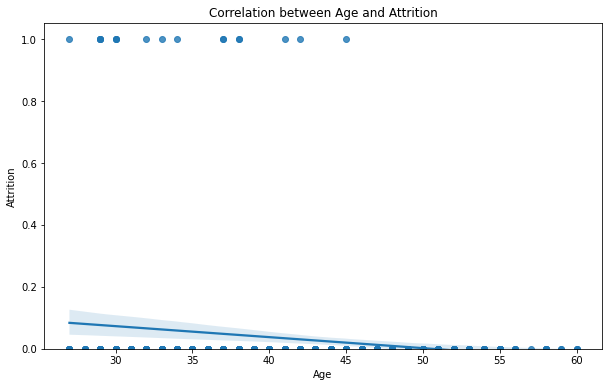

In [ ]:
# plot Age	Attrition
plt.figure(figsize=(10, 6))
# replot(<sumbu_x>, <sumbu_y>, <data_yang_ditampilkan>)
sns.regplot(x="Age", y="Attrition", data=realcase_df)
plt.ylim(0,);
# judul
plt.title("Correlation between Age and Attrition")

Text(0.5, 1.0, 'Correlation between YearsWithCurrManager and Attrition')

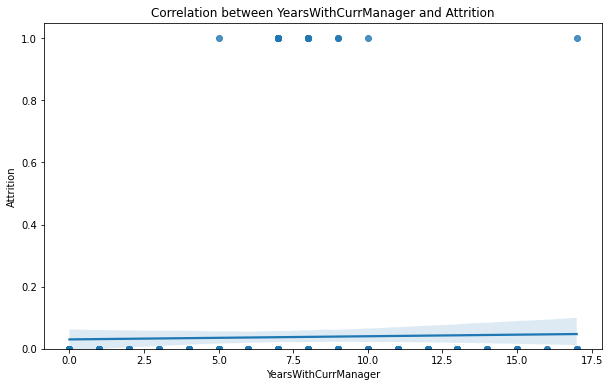

In [ ]:
# plot YearsWithCurrManager Attrition
plt.figure(figsize=(10, 6))
# replot(<sumbu_x>, <sumbu_y>, <data_yang_ditampilkan>)
sns.regplot(x="YearsWithCurrManager", y="Attrition", data=realcase_df)
plt.ylim(0,);
# judul
plt.title("Correlation between YearsWithCurrManager and Attrition")